<a href="https://colab.research.google.com/github/Rebecca38/Machine_Learning_Projects/blob/master/Predict_Diabetes_progression_using_KNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####= Loading the wine *dataset*

In [2]:
data = load_diabetes()
X = data.data
y = data.target

#### Splitting data into 70% training and 30% testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Training the KNN regression model with K=5

In [4]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

#### Predict outcomes and evaluate the results using MSE and RMSE

In [6]:
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE) on Test Data: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse:.2f}")

Mean Squared Error (MSE) on Test Data: 3222.12
Root Mean Squared Error (RMSE) on Test Data: 56.76


#### Displaying sample data

In [9]:
print("\nSample Features and Target:")
print("Features:", X[0])
print("Target (Diabetes Progression):", y[0])


Sample Features and Target:
Features: [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
Target (Diabetes Progression): 151.0


#### Residual Plot

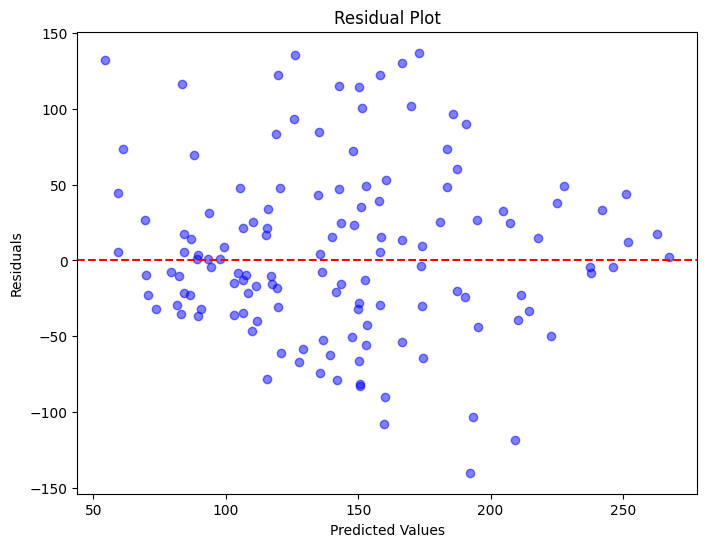

In [10]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### Predicted vs Actual Value Plot

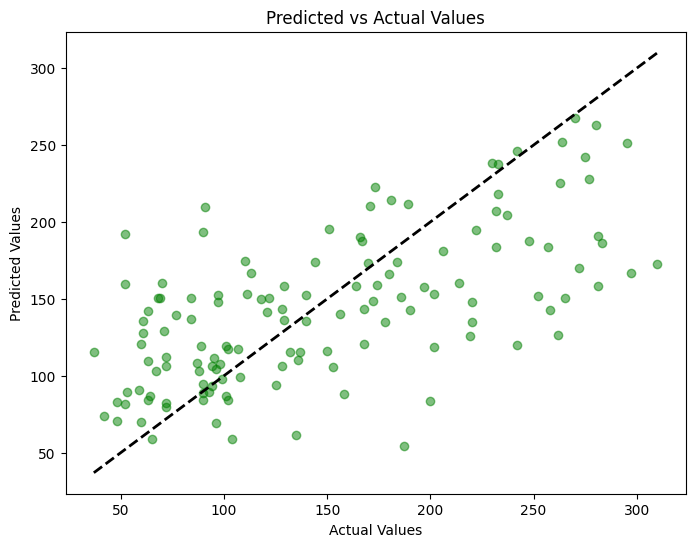

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

#### RMSE Plot

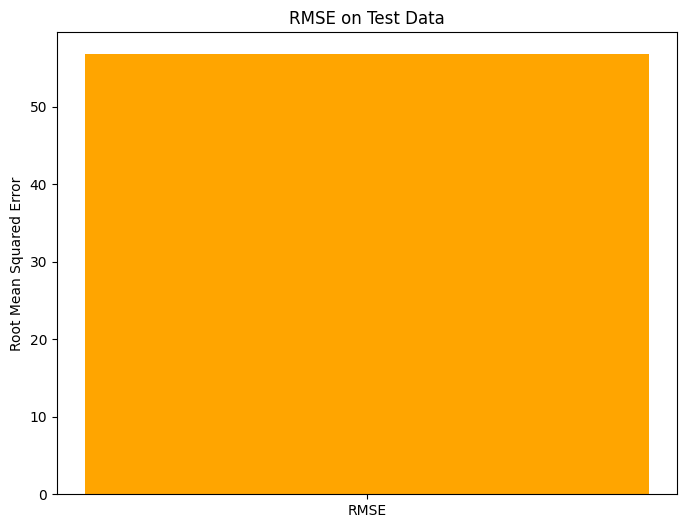

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(['RMSE'], [rmse], color='orange')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE on Test Data')
plt.show()

#### Cross Validation

In [13]:
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  # Convert negative MSE to positive
cv_rmse_scores = np.sqrt(cv_mse_scores)  # Calculate RMSE for each fold
print("\n5-Fold Cross-Validation Results (RMSE):")
for i, score in enumerate(cv_rmse_scores):
    print(f"Fold {i+1}: {score:.2f}")
print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f} (+/- {cv_rmse_scores.std() * 2:.2f})")


5-Fold Cross-Validation Results (RMSE):
Fold 1: 56.28
Fold 2: 63.42
Fold 3: 59.64
Fold 4: 59.59
Fold 5: 61.71
Average CV RMSE: 60.13 (+/- 4.79)


#### Display feature names for reference

In [14]:
print("\nFeature Names:")
for i, name in enumerate(data.feature_names):
    print(f"{i}: {name}")


Feature Names:
0: age
1: sex
2: bmi
3: bp
4: s1
5: s2
6: s3
7: s4
8: s5
9: s6
